# How to read and visualize results from FEAP with FEAPy

This notebook gives you a short introduction on how to read and visualize compuational results using the FEAPy package.

In [1]:
from feapy.Feapy import FEAPy
import os

After we have imported the basic FEAPy class, we can again are setting up our computational framework.

In [2]:
# Create a directory to run simulations in
simulation_directory = os.path.join(os.getcwd(), "Simulation")
if not os.path.isdir(simulation_directory):
    os.mkdir(simulation_directory)  

# initialize feapy runner and clean directory
runner = FEAPy(executable="gak_feap", working_dir=simulation_directory)
runner.clean()

Within this example, we use a simple uniaxialy displacement-loaded block that is devided into a number of elements in x,y and z direction. As a material model, a standard Neo-Hookean model is applied.
Before running our simulationt, we want to create an input file with a particular choice of e.g. material parameters. For this we first define some parameters, in this case the youngs modulus, the Poisson ratio as well as some mesh dependent properties.

In [3]:
# Material parameters
E = 10000 # Youngs modulus
nu = 0.3  # Poisson ratio

# Mesh parameters
x_length = 1
y_length = 1
z_length = 1
num_el_x = 10
num_el_y = 10
num_el_z = 10

# Displacement and time step size
displacement = 1.0
delta_t = 0.1
num_timesteps = 10.0

Next, we can pass the parameters into the ```create_inputfile``` function to build an input file from a jinja template. In this case, the template is written in the [Iinput.jinja](Iinput.jinja) file. Here, the values you want to be replaced when creating an input file are written in double curly braces and have to be passed into the ```create_inputfile``` function of the runner.

In [4]:
# Create input file from jinja template
parameters = {
    "YOUNGS_MOD": E,
    "POISSON": nu,
    "XL": x_length,
    "YL": y_length,
    "ZL": z_length,
    "EX": num_el_x,
    "EY": num_el_y,
    "EZ": num_el_z,
    "DISP": displacement,
    "NUMTS": num_timesteps,
    "DT": delta_t
}
runner.create_inputfile("Iinput", parameters)

Now we are good to go. Let us run the corresponding input file by calling the ```run``` method of our runner.

In [5]:
# Run computation
runner.run("Iinput")

CompletedProcess(args=['gak_feap', '-iIinput'], returncode=0)

To load the force-displacement data FEAP created using the ```tplo``` command, we con use the ```read_output``` function of FEAPy.

In [6]:
data = runner.read_output("Iinput", sum_names=["ts", "f"], dis_names=["ts", "u"])

For this, you need to define the column names of the ```.dis``` and ```.sum``` files FEAP has created during execution. FEAPy will then return a pandas dataframe object you can work with. E.g. you can plot the force-displacement diagram using:

<AxesSubplot:xlabel='u'>

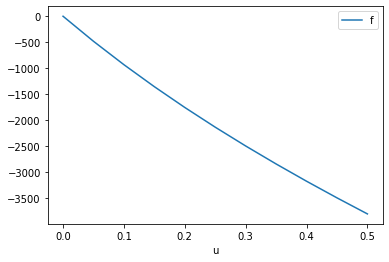

In [8]:
data.plot(x="u", y="f")

For more information on how to use pandas to evaluate and visualize datasets, please take a look at the [official documentation](https://pandas.pydata.org/).

Thats it!

To get more information on the capabilities of FEAPy, take a look at the other examples.